# Pre-processing of CHIRPS precipitation dataset for Leeds Met Office Hackathon - Ministry for Food and Agriculture, Guana Group

#### Using Iris for NetCDF data load and processing

##### Timothy Lam t.lam@exeter.ac.uk

#### Imports

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os

import iris

import iris.quickplot as qplt
import iris.coord_categorisation as coord_cat

import pandas as pd

import statsmodels.api as sm

#### Set data path

In [2]:
DATA_PATH = '/gws/pw/j05/cop26_hackathons/leeds/CHIRPS/'

#### Check variables of the NetCDF file

In [5]:
precip_path = iris.load(DATA_PATH + 'chirps.nc')
print (precip_path[0])

Climate Hazards group InfraRed Precipitation with Stations / (mm/day) (time: 14579; latitude: 400; longitude: 1440)
     Dimension coordinates:
          time                                                             x                -               -
          latitude                                                         -                x               -
          longitude                                                        -                -               x
     Attributes:
          Conventions: CF-1.6
          acknowledgements: The Climate Hazards Group InfraRed Precipitation with Stations development...
          comments:  time variable denotes the first day of the given day.
          creator_email: pete@geog.ucsb.edu
          creator_name: Pete Peterson
          date_created: 2015-10-07
          documentation: http://pubs.usgs.gov/ds/832/
          faq: http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
          ftp_url: ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/prod

#### Load monthly precipitation data into an Iris cube

In [21]:
precip_path = os.path.join(DATA_PATH, 'chirps.nc')
print (precip_path)
precip = iris.load_cube(precip_path, 'Climate Hazards group InfraRed Precipitation with Stations')
precip.coord('latitude').guess_bounds()
precip.coord('longitude').guess_bounds()

/gws/pw/j05/cop26_hackathons/leeds/CHIRPS/chirps.nc


#### Plot some data

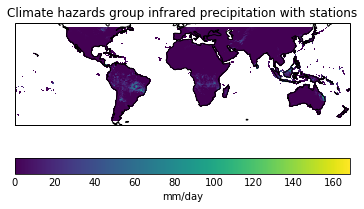

In [5]:
qplt.pcolormesh(precip[0]) # plot the first time in the cube
plt.gca().coastlines()

#### Extract Guana region (by Courtesy of Michael)

In [22]:
# Create a constraint for the latitude and Longitude extents 

# Create a constraint for the latitude and Longitude extents 

N_Guana_lat = iris.Constraint(latitude=lambda v: v >= 8 and v <= 11 )
N_Guana_lon = iris.Constraint(longitude=lambda v: v >= -3.5 and v <= 1.2 )

S_Guana_lat = iris.Constraint(latitude=lambda v: v >= 4.5 and v <= 8 )
S_Guana_lon = iris.Constraint(longitude=lambda v: v >= -3.5 and v <= 1.2 )

N_Guana_precip =  precip.extract(N_Guana_lat & N_Guana_lon) 
S_Guana_precip =  precip.extract(S_Guana_lat & S_Guana_lon) 

In [8]:
print (N_Guana_precip)
print (S_Guana_precip)

Climate Hazards group InfraRed Precipitation with Stations / (mm/day) (time: 14579; latitude: 14; longitude: 20)
     Dimension coordinates:
          time                                                             x                -              -
          latitude                                                         -                x              -
          longitude                                                        -                -              x
     Attributes:
          Conventions: CF-1.6
          acknowledgements: The Climate Hazards Group InfraRed Precipitation with Stations development...
          comments:  time variable denotes the first day of the given day.
          creator_email: pete@geog.ucsb.edu
          creator_name: Pete Peterson
          date_created: 2015-10-07
          documentation: http://pubs.usgs.gov/ds/832/
          faq: http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
          ftp_url: ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/C

#### Plot some data to check

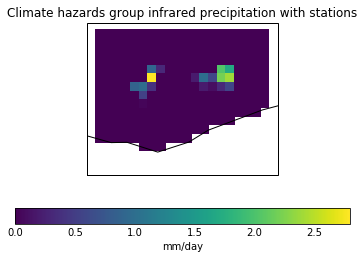

In [8]:
qplt.pcolormesh(S_Guana_precip[0]) # plot the rainfall in the first time step
plt.gca().coastlines()

#### Create Seasonal Means

In [23]:
coord_cat.add_season(N_Guana_precip, 'time', name='clim_season')
coord_cat.add_season_year(N_Guana_precip, 'time', name='season_year')

coord_cat.add_season(S_Guana_precip, 'time', name='clim_season')
coord_cat.add_season_year(S_Guana_precip, 'time', name='season_year')

In [12]:
print(S_Guana_precip)

Climate Hazards group InfraRed Precipitation with Stations / (mm/day) (time: 14579; latitude: 16; longitude: 20)
     Dimension coordinates:
          time                                                             x                -              -
          latitude                                                         -                x              -
          longitude                                                        -                -              x
     Auxiliary coordinates:
          clim_season                                                      x                -              -
          season_year                                                      x                -              -
     Attributes:
          Conventions: CF-1.6
          acknowledgements: The Climate Hazards Group InfraRed Precipitation with Stations development...
          comments:  time variable denotes the first day of the given day.
          creator_email: pete@geog.ucsb.edu
          crea

In [24]:
N_Guana = N_Guana_precip.aggregated_by(
    ['clim_season', 'season_year'],
    iris.analysis.MEAN)

S_Guana = S_Guana_precip.aggregated_by(
    ['clim_season', 'season_year'],
    iris.analysis.MEAN)

In [29]:
for season, year in zip(
    S_Guana.coord('clim_season')[:10].points,
    S_Guana.coord('season_year')[:10].points):
    print(season + ' ' + str(year))

djf 1981
mam 1981
jja 1981
son 1981
djf 1982
mam 1982
jja 1982
son 1982
djf 1983
mam 1983


#### Plot some data to check

Climate Hazards group InfraRed Precipitation with Stations / (mm/day) (time: 160; latitude: 16; longitude: 20)
     Dimension coordinates:
          time                                                             x              -              -
          latitude                                                         -              x              -
          longitude                                                        -              -              x
     Auxiliary coordinates:
          clim_season                                                      x              -              -
          season_year                                                      x              -              -
     Attributes:
          Conventions: CF-1.6
          acknowledgements: The Climate Hazards Group InfraRed Precipitation with Stations development...
          comments:  time variable denotes the first day of the given day.
          creator_email: pete@geog.ucsb.edu
          creator_name: Pe

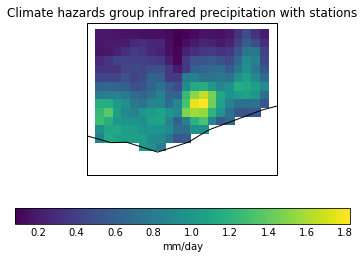

In [15]:
print(S_Guana)
qplt.pcolormesh(S_Guana[0]) # plot the rainfall in the first time step
plt.gca().coastlines()

In [25]:
grid_area_weights = iris.analysis.cartography.area_weights(N_Guana)

# Perform the area-weighted mean using the computed grid-box areas.
N_Guana_mean = N_Guana.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)

/opt/jaspy/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [26]:
grid_area_weights = iris.analysis.cartography.area_weights(S_Guana)

# Perform the area-weighted mean using the computed grid-box areas.
S_Guana_mean = S_Guana.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)

#### Extract JJA data

In [30]:
jja_constraint = iris.Constraint(clim_season='jja')
year_constraint = iris.Constraint(season_year=lambda v: v > 1996 and v <= 2006 )

N_Guana_jja = N_Guana_mean.extract(jja_constraint & year_constraint)
S_Guana_jja = S_Guana_mean.extract(jja_constraint & year_constraint)
print(N_Guana_jja)
print(S_Guana_jja)


Climate Hazards group InfraRed Precipitation with Stations / (mm/day) (time: 10)
     Dimension coordinates:
          time                                                             x
     Auxiliary coordinates:
          clim_season                                                      x
          season_year                                                      x
     Scalar coordinates:
          latitude: 9.5 degrees, bound=(7.75, 11.25) degrees
          longitude: -1.25 degrees, bound=(-3.75, 1.25) degrees
     Attributes:
          Conventions: CF-1.6
          acknowledgements: The Climate Hazards Group InfraRed Precipitation with Stations development...
          comments:  time variable denotes the first day of the given day.
          creator_email: pete@geog.ucsb.edu
          creator_name: Pete Peterson
          date_created: 2015-10-07
          documentation: http://pubs.usgs.gov/ds/832/
          faq: http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
          ftp_url: ftp

Text(0.5, 1.0, 'North Guana JJA Precip')

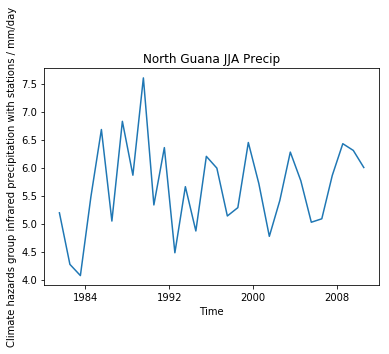

In [14]:
qplt.plot(N_Guana_jja)
plt.title('North Guana JJA Precip')

Text(0.5, 1.0, 'South Guana JJA Precip')

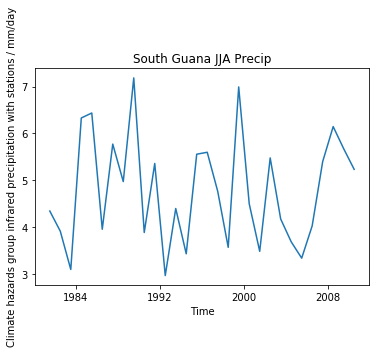

In [15]:
qplt.plot(S_Guana_jja)
plt.title('South Guana JJA Precip')

In [17]:
iris.save (N_Guana_jja, 'CHIRPS_N_Guana.nc')
iris.save (S_Guana_jja, 'CHIRPS_S_Guana.nc')

#### Compare with CP4 precipitation data (generated using 20210526-create_rainfall_CP4_Guana.ipynb)

In [3]:
N_Guana_CP4 = iris.load_cube('N_Guana_CP4.nc', 'stratiform_rainfall_rate')
S_Guana_CP4 = iris.load_cube('S_Guana_CP4.nc', 'stratiform_rainfall_rate')

N_Guana_jja = iris.load_cube('CHIRPS_N_Guana.nc', 'Climate Hazards group InfraRed Precipitation with Stations')
S_Guana_jja = iris.load_cube('CHIRPS_S_Guana.nc', 'Climate Hazards group InfraRed Precipitation with Stations')

In [4]:
# Extract between year 1997 and 2006 (due to CP4 data availability)
year_constraint = iris.Constraint(season_year=lambda v: v > 1996 and v <= 2006 )

N_Guana_jja = N_Guana_jja.extract(year_constraint)
S_Guana_jja = S_Guana_jja.extract(year_constraint)

/opt/jaspy/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     142.0
Date:                Tue, 25 May 2021   Prob (F-statistic):           8.16e-07
Time:                        23:00:09   Log-Likelihood:                -16.185
No. Observations:                  10   AIC:                             34.37
Df Residuals:                       9   BIC:                             34.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0708      0.090     11.918      0.0

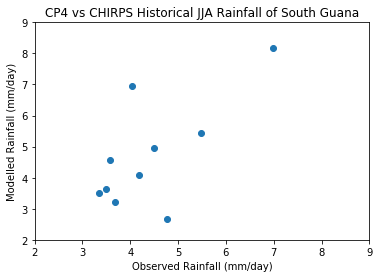

In [7]:
qplt.scatter(S_Guana_jja, S_Guana_CP4*86400)

plt.title('CP4 vs CHIRPS Historical JJA Rainfall of South Guana')
plt.ylabel ('Modelled Rainfall (mm/day)')
plt.xlabel ('Observed Rainfall (mm/day)')
plt.xlim (2, 9)
plt.ylim (2, 9)

slope = sm.OLS (S_Guana_CP4.data*86400, S_Guana_jja.data).fit()

print (slope.summary())

In [9]:
np.var (S_Guana_CP4.data*86400)

2.7219949556719985

In [10]:
np.var (S_Guana_jja.data)

1.1382495165808428

/opt/jaspy/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     469.3
Date:                Tue, 25 May 2021   Prob (F-statistic):           4.48e-09
Time:                        23:01:33   Log-Likelihood:                -10.241
No. Observations:                  10   AIC:                             22.48
Df Residuals:                       9   BIC:                             22.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8820      0.041     21.663      0.0

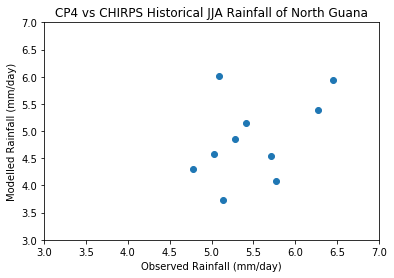

In [8]:
qplt.scatter(N_Guana_jja, N_Guana_CP4*86400)

plt.title('CP4 vs CHIRPS Historical JJA Rainfall of North Guana')
plt.ylabel ('Modelled Rainfall (mm/day)')
plt.xlabel ('Observed Rainfall (mm/day)')
plt.xlim (3, 7)
plt.ylim (3, 7)

slope = sm.OLS (N_Guana_CP4.data*86400, N_Guana_jja.data).fit()

print (slope.summary())

In [5]:
np.var (N_Guana_CP4.data*86400)

0.5271518354472944

In [7]:
np.var (N_Guana_jja.data)

0.27337329156649975